### Convert PyTorch Model to Core ML

#### Import and define DeOldfy Model

In [1]:
# Import DeOldfy libraries
import sys
sys.path.append('../')
from deoldify import device
from deoldify.device_id import DeviceId
from deoldify.visualize import *
import warnings

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

# Set Deoldfy configs
device.set(device=DeviceId.CPU)
torch.backends.cudnn.benchmark=True
plt.style.use('dark_background')
plt.style
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

NumExpr defaulting to 8 threads.


/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create DeOldfy Model
colorizer = get_image_colorizer(artistic=True)

/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight

In [3]:
# Open input image
input_img = Image.open('../test_images/image.png')

In [4]:
# Process input image
import torchvision.transforms as tf

transform_in = tf.Compose([
    tf.Resize((560,560)),
    tf.ToTensor(),
    tf.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transformed_img = transform_in(input_img).unsqueeze(0)

### Convert Model to Core ML

In [5]:
# Convert to TorchScript
trace = torch.jit.trace(colorizer.filter.filters[0].learn.model, transformed_img)

/Users/heitor/Projetos/DeOldify/CoreML Conversion/../deoldify/unet.py:88: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if ssh != up_out.shape[-2:]:


In [6]:
# Convert to CoreML
import coremltools as ct
mlmodel = ct.convert(
	trace,
	inputs=[ct.TensorType(name="input", shape=transformed_img.shape)],
    convert_to='neuralnetwork'
)

Torch version 2.1.0 has not been tested with coremltools. You may run into unexpected errors. Torch 2.0.0 is the most recent version that has been tested.
Converting graph.
Adding op 'layers.0.0.weight' of type const
Adding op 'layers.0.1.running_var' of type const
Adding op 'layers.0.1.running_mean' of type const
Adding op 'layers.0.1.bias' of type const
Adding op 'layers.0.1.weight' of type const
Adding op 'layers.0.4.0.conv1.weight' of type const
Adding op 'layers.0.4.0.bn1.running_var' of type const
Adding op 'layers.0.4.0.bn1.running_mean' of type const
Adding op 'layers.0.4.0.bn1.bias' of type const
Adding op 'layers.0.4.0.bn1.weight' of type const
Adding op 'layers.0.4.0.conv2.weight' of type const
Adding op 'layers.0.4.0.bn2.running_var' of type const
Adding op 'layers.0.4.0.bn2.running_mean' of type const
Adding op 'layers.0.4.0.bn2.bias' of type const
Adding op 'layers.0.4.0.bn2.weight' of type const
Adding op 'layers.0.4.1.conv1.weight' of type const
Adding op 'layers.0.4.1.

Converting PyTorch Frontend ==> MIL Ops:   0%|          | 0/693 [00:00<?, ? ops/s]

Converting op 22 : constant
Adding op '22' of type const
Converting op 23 : constant
Adding op '23' of type const
Converting op 24 : constant
Converting op 25 : constant
Adding op '25' of type const
Converting op 26 : constant
Adding op '26' of type const
Converting op 27 : constant
Adding op '27' of type const
Converting op 28 : constant
Adding op '28' of type const
Converting op 29 : constant
Adding op '29' of type const
Converting op 30 : constant
Adding op '30' of type const
Converting op 38 : listconstruct
Adding op '38' of type const
Converting op 39 : listconstruct
Adding op '39' of type const
Converting op 40 : listconstruct
Adding op '40' of type const
Converting op 41 : listconstruct
Adding op '41' of type const
Converting op input.1 : _convolution
Adding op 'input.1' of type conv
Adding op 'input.1_pad_type_0' of type const
Adding op 'input.1_pad_0' of type const
Converting op input.3 : batch_norm
Adding op 'input.3' of type batch_norm
Converting op input.5 : relu_
Adding op

Converting PyTorch Frontend ==> MIL Ops:  20%|█▉        | 137/693 [00:00<00:00, 1358.58 ops/s]

Converting op input.97 : batch_norm
Adding op 'input.97' of type batch_norm
Converting op input.99 : relu_
Adding op 'input.99' of type relu
Converting op 302 : listconstruct
Adding op '302' of type const
Converting op 303 : listconstruct
Adding op '303' of type const
Converting op 304 : listconstruct
Adding op '304' of type const
Converting op 305 : listconstruct
Adding op '305' of type const
Converting op input.101 : _convolution
Adding op 'input.101' of type conv
Adding op 'input.101_pad_type_0' of type const
Adding op 'input.101_pad_0' of type const
Converting op out.15 : batch_norm
Adding op 'out.15' of type batch_norm
Converting op 315 : listconstruct
Adding op '315' of type const
Converting op 316 : listconstruct
Adding op '316' of type const
Converting op 317 : listconstruct
Adding op '317' of type const
Converting op 318 : listconstruct
Adding op '318' of type const
Converting op input.103 : _convolution
Adding op 'input.103' of type conv
Adding op 'input.103_pad_type_0' of ty

Converting PyTorch Frontend ==> MIL Ops:  39%|███▉      | 273/693 [00:00<00:00, 1315.21 ops/s]

Converting op 566 : listconstruct
Adding op '566' of type const
Converting op 567 : listconstruct
Adding op '567' of type const
Converting op input.201 : _convolution
Adding op 'input.201' of type conv
Adding op 'input.201_pad_type_0' of type const
Adding op 'input.201_pad_0' of type const
Converting op out : batch_norm
Adding op 'out' of type batch_norm
Converting op input.203 : add_
Adding op 'input.203' of type add
Converting op input.205 : relu_
Adding op 'input.205' of type relu
Converting op 576 : tupleconstruct
Converting op 577 : tupleunpack
Converting op 582 : constant
Adding op '582' of type const
Converting op 583 : constant
Adding op '583' of type const
Converting op 584 : constant
Adding op '584' of type const
Converting op 585 : constant
Adding op '585' of type const
Converting op input.207 : batch_norm
Adding op 'input.207' of type batch_norm
Converting op input.209 : relu
Adding op 'input.209' of type relu
Converting op 592 : constant
Adding op '592' of type const
Conve

Converting PyTorch Frontend ==> MIL Ops:  58%|█████▊    | 405/693 [00:00<00:00, 480.49 ops/s] 

Converting op 788 : listconstruct
Adding op '788' of type const
Converting op 789 : listconstruct
Adding op '789' of type const
Converting op input.249 : _convolution
Adding op 'input.249' of type conv
Adding op 'input.249_pad_type_0' of type const
Adding op 'input.249_pad_0' of type const
Converting op input.251 : batch_norm
Adding op 'input.251' of type batch_norm
Converting op input.253 : relu_
Adding op 'input.253' of type relu
Converting op input.255 : pixel_shuffle
Adding op 'input.255' of type pixel_shuffle
Converting op 798 : listconstruct
Adding op '798' of type const
Converting op input.257 : pad
Adding op 'input.257' of type pad
Adding op 'input.257_pad_0' of type const
Adding op 'input.257_mode_0' of type const
Adding op 'input.257_constant_val_0' of type const
Converting op 800 : listconstruct
Adding op '800' of type const
Converting op 801 : listconstruct
Adding op '801' of type const
Converting op 802 : listconstruct
Adding op '802' of type const
Converting op up_out.5 :

Converting PyTorch Frontend ==> MIL Ops:  71%|███████   | 489/693 [00:00<00:00, 462.37 ops/s]

Converting op input.275 : bmm
Adding op 'input.275' of type matmul
Adding op 'input.275_transpose_x_0' of type const
Adding op 'input.275_transpose_y_0' of type const
Converting op beta : softmax
Adding op 'beta' of type softmax
Converting op 924 : bmm
Adding op '924' of type matmul
Adding op '924_transpose_x_0' of type const
Adding op '924_transpose_y_0' of type const
Converting op 925 : mul
Adding op '925' of type mul
Converting op o : add
Adding op 'o' of type add
Converting op 927 : listconstruct
Adding op '927' of type const
Converting op 928 : view
Adding op 'cast_34' of type cast
Adding op 'cast_34_dtype_0' of type const
Adding op '928' of type reshape
Converting op input.277 : contiguous
Setting pytorch op:   %input.277 = contiguous[](%928, %765) to no-op.
Converting op 930 : constant
Adding op '930' of type const
Converting op 931 : constant
Adding op '931' of type const
Converting op 932 : constant
Converting op 933 : constant
Adding op '933' of type const
Converting op 934 :

Converting PyTorch Frontend ==> MIL Ops:  80%|████████  | 557/693 [00:01<00:00, 420.12 ops/s]

Converting op 1032 : constant
Adding op '1032' of type const
Converting op 1033 : constant
Adding op '1033' of type const
Converting op 1034 : constant
Converting op 1035 : constant
Adding op '1035' of type const
Converting op 1036 : constant
Adding op '1036' of type const
Converting op 1037 : constant
Adding op '1037' of type const
Converting op 1038 : constant
Adding op '1038' of type const
Converting op 1039 : constant
Adding op '1039' of type const
Converting op 1040 : constant
Adding op '1040' of type const
Converting op 1041 : constant
Adding op '1041' of type const
Converting op 1054 : size
Adding op '1054_shape' of type shape
Adding op 'const_20' of type const
Converting op 1055 : listconstruct
Adding op '1055' of type const
Converting op weight_mat.29 : reshape
Adding op 'cast_44' of type cast
Adding op 'cast_44_dtype_0' of type const
Adding op 'weight_mat.29' of type reshape
Converting op 1057 : mv
Adding op '1057_expanded' of type expand_dims
Adding op '1057_expanded_axes_0'

Converting PyTorch Frontend ==> MIL Ops:  88%|████████▊ | 613/693 [00:01<00:00, 272.79 ops/s]

Converting op 1126 : listconstruct
Adding op '1126' of type const
Converting op input.325 : _convolution
Adding op 'input.325' of type conv
Adding op 'input.325_pad_type_0' of type const
Adding op 'input.325_pad_0' of type const
Converting op input.327 : relu_
Adding op 'input.327' of type relu
Converting op input.329 : batch_norm
Adding op 'input.329' of type batch_norm
Converting op 1134 : constant
Adding op '1134' of type const
Converting op 1135 : constant
Converting op 1136 : constant
Adding op '1136' of type const
Converting op 1137 : constant
Adding op '1137' of type const
Converting op 1138 : constant
Adding op '1138' of type const
Converting op 1139 : constant
Adding op '1139' of type const
Converting op 1140 : constant
Adding op '1140' of type const
Converting op weight.251 : _weight_norm
Adding op 'pow_0' of type pow
Adding op 'pow_0_y_0' of type const
Adding op 'reduce_sum_17' of type reduce_sum
Adding op 'reduce_sum_17_axes_0' of type const
Adding op 'reduce_sum_17_keep_di

Converting PyTorch Frontend ==> MIL Ops:  95%|█████████▌| 659/693 [00:01<00:00, 294.05 ops/s]

Converting op 1202 : listconstruct
Adding op '1202' of type const
Converting op weight_mat.37 : reshape
Adding op 'cast_56' of type cast
Adding op 'cast_56_dtype_0' of type const
Adding op 'weight_mat.37' of type reshape
Converting op 1204 : mv
Adding op '1204_expanded' of type expand_dims
Adding op '1204_expanded_axes_0' of type const
Adding op '1204_mv' of type matmul
Adding op '1204_mv_transpose_x_0' of type const
Adding op '1204_mv_transpose_y_0' of type const
Adding op '1204' of type squeeze
Adding op '1204_axes_0' of type const
Converting op sigma.37 : dot
Adding op 'mul_19' of type mul
Adding op 'reduce_sum_19' of type reduce_sum
Adding op 'reduce_sum_19_axes_0' of type const
Adding op 'reduce_sum_19_keep_dims_0' of type const
Converting op weight.259 : div
Adding op 'cast_57' of type cast
Adding op 'cast_57_dtype_0' of type const
Adding op 'cast_58' of type cast
Adding op 'cast_58_dtype_0' of type const
Adding op 'weight.259' of type real_div
Converting op 1208 : listconstruct


Running MIL frontend_pytorch pipeline:   0%|          | 0/5 [00:00<?, ? passes/s]

Performing pass: "common::dead_code_elimination"
Removing op "1239" (type: const)
Removing op "1237" (type: const)
Removing op "1235" (type: const)
Removing op "const_25" (type: const)
Removing op "1227_shape" (type: shape)
Removing op "1219" (type: const)
Removing op "1218" (type: const)
Removing op "1217" (type: const)
Removing op "1216" (type: const)
Removing op "1211" (type: const)
Removing op "1209" (type: const)
Removing op "const_24" (type: const)
Removing op "1201_shape" (type: shape)
Removing op "1191" (type: const)
Removing op "1189" (type: const)
Removing op "const_23" (type: const)
Removing op "1181_shape" (type: shape)
Removing op "1168" (type: const)
Removing op "1167" (type: const)
Removing op "1166" (type: const)
Removing op "1165" (type: const)
Removing op "1160" (type: const)
Removing op "1156" (type: const)
Removing op "1152" (type: const)
Removing op "1150" (type: const)
Removing op "1139" (type: const)
Removing op "1138" (type: const)
Removing op "1137" (type: cons

Running MIL frontend_pytorch pipeline:  20%|██        | 1/5 [00:00<00:00,  4.46 passes/s]

Performing pass: "common::loop_invariant_elimination"
Performing pass: "common::dead_code_elimination"
Performing pass: "torch::torch_upsample_to_core_upsample"
Performing pass: "torch::torch_tensor_assign_to_core"


Running MIL default pipeline:   0%|          | 0/65 [00:00<?, ? passes/s]

Performing pass: "common::lower_complex_dialect_ops"
Performing pass: "common::update_output_dtypes"
Performing pass: "common::cast_optimization"
Performing pass: "common::noop_elimination"
Performing pass: "common::int_op_canonicalization"
Performing pass: "common::nullify_redundant_quantization_zero_point"
Performing pass: "common::dequantize_quantize_pair_elimination"
Performing pass: "common::distributive_quantized_binary_op_scale_normalization"
Performing pass: "common::dequantize_to_constexpr"
Performing pass: "common::const_elimination"
Adding op 'weight_mat.1' of type const
Adding op '612_expanded' of type const
Adding op '612_mv' of type const
Adding op '612' of type const
Adding op 'mul_0' of type const
Adding op 'reduce_sum_0' of type const
Adding op 'weight.149' of type const
Adding op 'weight_mat.3' of type const
Adding op '636_expanded' of type const
Adding op '636_mv' of type const
Adding op '636' of type const
Adding op 'mul_1' of type const
Adding op 'reduce_sum_1' of 

/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:267: UserWarning: Output, '1244', of the source model, has been renamed to 'var_1244' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
Running MIL default pipeline:  20%|██        | 13/65 [00:00<00:00, 129.19 passes/s]

Performing pass: "common::add_conv_transpose_output_shape"
Performing pass: "common::const_elimination"
Performing pass: "common::const_deduplication"
Performing pass: "common::loop_invariant_elimination"
Performing pass: "common::remove_symbolic_reshape"
remove_symbolic_reshape: changed 0 reshapes.
Performing pass: "common::noop_elimination"
Performing pass: "common::fuse_matmul_weight_bias"
Performing pass: "common::fuse_linear_bias"
Performing pass: "common::fuse_gelu_tanh_approximation"
Adding op 'pow' of type pow
Adding op 'pow_y_0' of type const
Adding op 'mul_1' of type mul
Adding op 'mul_1_x_0' of type const
Adding op 'add' of type add
Adding op 'mul_2' of type mul
Adding op 'mul_2_x_0' of type const
Adding op 'tanh' of type tanh
Adding op 'add_1' of type add
Adding op 'add_1_x_0' of type const
Adding op 'mul' of type mul
Adding op 'mul_x_0' of type const
Adding op 'mul_3' of type mul
Adding op 'pow' of type pow
Adding op 'pow_y_1' of type const
Adding op 'mul_1' of type mul
Ad

Running MIL default pipeline:  49%|████▉     | 32/65 [00:00<00:00, 121.66 passes/s]

Performing pass: "common::fuse_conv_scale"
Performing pass: "common::fuse_conv_bias"
Performing pass: "common::fuse_onehot_matmul_to_gather"
Performing pass: "common::fuse_layernorm_or_instancenorm"
Performing pass: "common::fuse_elementwise_to_batchnorm"
Performing pass: "common::fuse_reduce_mean"
Performing pass: "common::fuse_conv_batchnorm"
Adding op 'input.3' of type conv
Adding op 'input.3_weight_0' of type const
Adding op 'input.3_bias_0' of type const
Adding op 'input.11' of type conv
Adding op 'input.11_weight_0' of type const
Adding op 'input.11_bias_0' of type const
Adding op 'out.1' of type conv
Adding op 'out.1_weight_0' of type const
Adding op 'out.1_bias_0' of type const
Adding op 'input.23' of type conv
Adding op 'input.23_weight_0' of type const
Adding op 'input.23_bias_0' of type const
Adding op 'out.3' of type conv
Adding op 'out.3_weight_0' of type const
Adding op 'out.3_bias_0' of type const
Adding op 'input.35' of type conv
Adding op 'input.35_weight_0' of type co

Running MIL default pipeline:  69%|██████▉   | 45/65 [00:00<00:00, 89.04 passes/s] 

Performing pass: "common::prelu_to_lrelu"
Performing pass: "common::merge_consecutive_relus"
Performing pass: "common::merge_consecutive_reshapes"
Performing pass: "common::merge_consecutive_transposes"
Performing pass: "common::expand_high_rank_reshape_and_transpose"
Performing pass: "common::reduce_transposes"
Adding op 'identity_1' of type identity
Performing pass: "common::remove_redundant_ops"
Performing pass: "common::dead_code_elimination"
Removing op "cast_61_dtype_0" (type: const)
Removing op "cast_60_dtype_0" (type: const)
Removing op "reduce_sum_20" (type: const)
Removing op "reduce_sum_20_keep_dims_0" (type: const)
Removing op "reduce_sum_20_axes_0" (type: const)
Removing op "mul_20" (type: const)
Removing op "1230" (type: const)
Removing op "1230_axes_0" (type: const)
Removing op "1230_mv" (type: const)
Removing op "1230_mv_transpose_y_0" (type: const)
Removing op "1230_mv_transpose_x_0" (type: const)
Removing op "1230_expanded" (type: const)
Removing op "1230_expanded_axe

Running MIL default pipeline:  85%|████████▍ | 55/65 [00:00<00:00, 74.52 passes/s]

Performing pass: "common::cast_optimization"
Performing pass: "common::const_elimination"
Performing pass: "common::const_deduplication"
Performing pass: "common::loop_invariant_elimination"
Performing pass: "common::noop_elimination"
Performing pass: "common::dedup_op_and_var_names"
Performing pass: "common::reduce_transposes"
Adding op 'identity_2' of type identity
Performing pass: "common::remove_redundant_ops"
Performing pass: "common::topological_reorder"
Adding op 'transpose_0' of type transpose
Performing pass: "common::dead_code_elimination"


Running MIL backend_neuralnetwork pipeline:   0%|          | 0/9 [00:00<?, ? passes/s]

Performing pass: "nn_backend::decompose_conv1d"
Adding op 'expand_dims_0' of type expand_dims
Adding op 'expand_dims_0_axes_0' of type const
Adding op 'expand_dims_1' of type expand_dims
Adding op 'expand_dims_1_axes_0' of type const
Adding op 'conv_0' of type conv
Adding op 'conv_0_pad_type_0' of type const
Adding op 'conv_0_groups_0' of type const
Adding op 'conv_0_strides_0' of type const
Adding op 'conv_0_pad_0' of type const
Adding op 'conv_0_dilations_0' of type const
Adding op 'f' of type squeeze
Adding op 'f_axes_0' of type const
Adding op 'expand_dims_2' of type expand_dims
Adding op 'expand_dims_2_axes_0' of type const
Adding op 'expand_dims_3' of type expand_dims
Adding op 'expand_dims_3_axes_0' of type const
Adding op 'conv_1' of type conv
Adding op 'conv_1_pad_type_0' of type const
Adding op 'conv_1_groups_0' of type const
Adding op 'conv_1_strides_0' of type const
Adding op 'conv_1_pad_0' of type const
Adding op 'conv_1_dilations_0' of type const
Adding op 'g.1' of type s

Translating MIL ==> NeuralNetwork Ops:  63%|██████▎   | 417/665 [00:11<00:12, 19.64 ops/s]  

Unsupported float type 'scale_factor_height' (0.97222501039505) for neuralnetwork. Falling back to bilinear interpolation.
Unsupported float type 'scale_factor_width' (0.97222501039505) for neuralnetwork. Falling back to bilinear interpolation.


Translating MIL ==> NeuralNetwork Ops:  77%|███████▋  | 512/665 [00:18<00:08, 18.49 ops/s]

added const layers.5.conv2.3.gamma for builder <coremltools.models.neural_network.builder.NeuralNetworkBuilder object at 0x1758a5250>


Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 665/665 [00:24<00:00, 26.89 ops/s]


### Use the MLModel to color an image

In [7]:
# Make a prediction using Core ML
out_mlmodel = mlmodel.predict({"input": transformed_img})
output = out_mlmodel['var_1244'][0]

In [8]:
# Postprocess the image
transform_out = tf.Compose([
    tf.Normalize([0., 0., 0.], [1/0.229, 1/0.224, 1/0.225]),
    tf.Normalize([-0.485, -0.456, -0.406], [ 1., 1., 1. ]),
    tf.Resize((input_img.size[1],input_img.size[0])),
    # lambda x: x*255,
    tf.ToPILImage(),
])
output_img = transform_out(torch.tensor(output))

/Users/heitor/miniconda3/envs/ColorNet/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(-0.5, 4162.5, 2744.5, -0.5)

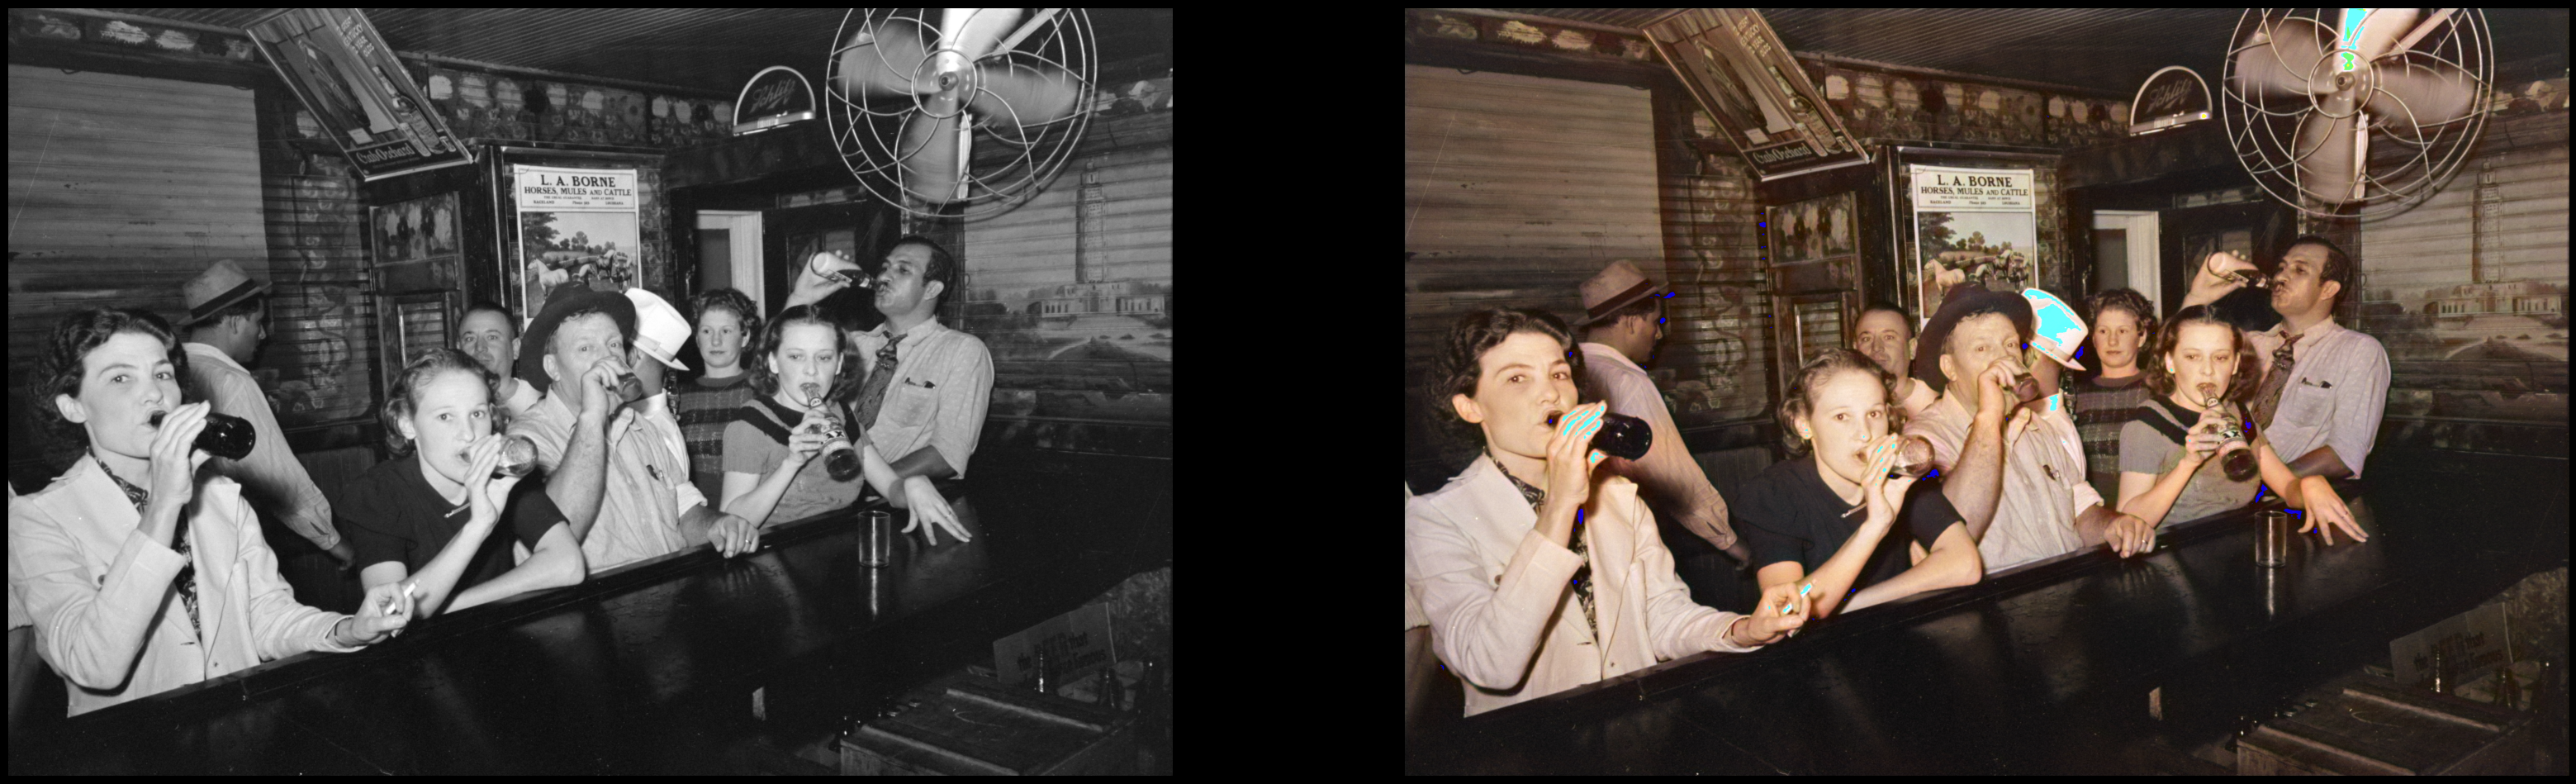

In [9]:
import cv2
import matplotlib.pyplot as plt

color_np = np.array(output_img)
orig_np = np.array(input_img)
color_yuv = cv2.cvtColor(color_np, cv2.COLOR_RGB2YUV)
# do a black and white transform first to get better luminance values
orig_yuv = cv2.cvtColor(orig_np, cv2.COLOR_RGB2YUV)
hires = np.copy(orig_yuv)
hires[:, :, 1:3] = color_yuv[:, :, 1:3]
final = cv2.cvtColor(hires, cv2.COLOR_YUV2RGB)
final = Image.fromarray(final)
f, axarr = plt.subplots(1,2, figsize=(40,40))
axarr[0].imshow(input_img)
axarr[0].axis('off')
axarr[1].imshow(final)
axarr[1].axis('off')

In [10]:
# Save the model file
mlmodel.save("deoldfy.mlmodel")